<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/Copy_of_start_here.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required dependencies
You'll need recent versions of Jupyter (but if you're reading this, you are probably OK), scikit-learn, numpy, pandas, matplotlib and seaborn. The most recent versions should be fine. You are free to use any other package under the sun, but I suspect you will be at least needing the above.

I advise you to use a form of virtual environments to manage your python projects (e.g. venv, conda etc.).

To get free GPU time, you can try Google Colab. It is a tool for running notebooks like this on the fly, and provides you with a VM and a GPU for free. Almost all packages for machine learning are automatically installed, and I suspect you could do the entire project on Colab if you wanted to. Still, it is useful to learn how to set up your environment on your own pc as well, and Colab is a bit more complicated when you have to import your datasets (best to import/download them from a Google Drive for speed instead of uploading them from local machines). Colab could become useful if you intend to try the deep learning approaches with TensorFlow and PyTorch, and you don't have a GPU yourself.

In [53]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# standard packages used to handle files:
import sys
import os
import glob
import time

# scikit-learn machine learning library:
import sklearn

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns

# tell matplotlib that we plot in a notebook:

%matplotlib inline

#import regression model libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS, add_constant
from sklearn import metrics
from sklearn.linear_model import LinearRegression



Define your folder structure with your data:

In [7]:
data_folder = "/content/"


In [8]:
train_data = pd.read_csv(data_folder + "training_data.csv")
#test_data = pd.read_csv(data_folder + "test_data.csv")

### Data exploration
Let's take a look at our train and test data:

In [15]:
train_data.head()

active_power            timestamp  pitch_angle  reactive_power  \
0     801.22998  2013-01-01 00:00:00         -1.0       67.559998   
1     943.16998  2013-01-01 00:10:00         -1.0       70.260002   
2     998.48999  2013-01-01 00:20:00         -1.0       75.330002   
3     837.96002  2013-01-01 00:30:00         -1.0       82.739998   
4     871.57001  2013-01-01 00:40:00         -1.0       82.349998   

   nacelle_angle  nacelle_temp  wind_speed1  wind_speed2  wind_speed_avg  \
0      286.00000     20.129999         7.52         7.76            7.64   
1      286.00000     21.420000         8.18         8.45            8.31   
2      286.00000     22.049999         8.29         8.66            8.47   
3      286.00000     22.299999         7.89         8.24            8.06   
4      294.17999     22.600000         7.86         8.20            8.03   

   wind_angle  ...  outdoor_temp  rotor_angular_velocity  rotor_bearing_temp  \
0   286.19000  ...          5.44               16.950001           26.049999   
1   288.32999  ...          5.74               17.139999           26.100000   
2   293.04001  ...          6.09               17.150000           26.219999   
3   294.01999  ...          6.35               16.910000           26.309999   
4   299.22000  ...          6.51               16.920000           26.389999   

   weather_temp  pressure  humidity  weather_wind_speed  weather_wind_angle  \
0          5.39    1011.0      75.0                5.66               180.0   
1          5.39    1011.0      75.0                5.66               180.0   
2          5.39    1011.0      75.0                5.66               180.0   
3          5.39    1011.0      75.0                5.66               180.0   
4          5.39    1011.0      75.0                5.66               180.0   

   rain_1h  snow_1h  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  

[5 rows x 21 columns]

Let's take a look at our first 200 datapoints in the training set:

<Axes: xlabel='timestamp'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

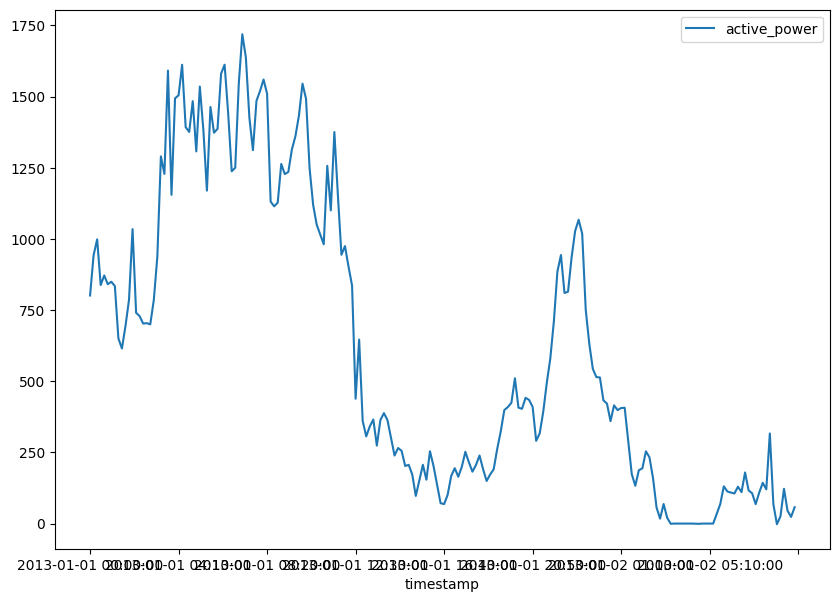

In [21]:
train_data[0:200].plot(x="timestamp", y="active_power", figsize=(10,7))

In [22]:
#test_data.head()

Size of data

In [23]:
train_data.shape
#test_data.shape

(208910, 21)

Data Info

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208910 entries, 0 to 208909
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   active_power            208910 non-null  float64
 1   timestamp               208910 non-null  object 
 2   pitch_angle             208910 non-null  float64
 3   reactive_power          208910 non-null  float64
 4   nacelle_angle           208910 non-null  float64
 5   nacelle_temp            208910 non-null  float64
 6   wind_speed1             208910 non-null  float64
 7   wind_speed2             208910 non-null  float64
 8   wind_speed_avg          208910 non-null  float64
 9   wind_angle              208910 non-null  float64
 10  vane_angle              208910 non-null  float64
 11  outdoor_temp            208910 non-null  float64
 12  rotor_angular_velocity  208910 non-null  float64
 13  rotor_bearing_temp      208910 non-null  float64
 14  weather_temp        

Create Box plot

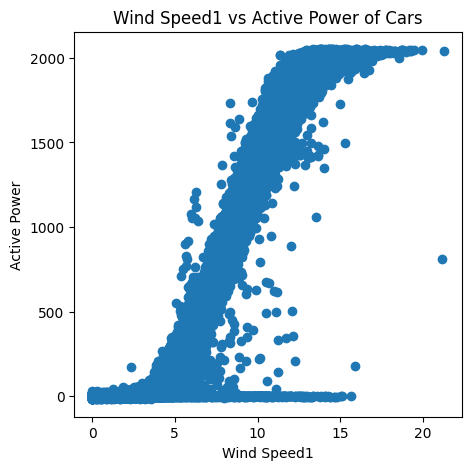

In [28]:
#Box = sns.boxplot(train_data['active_power'])
plt.figure(figsize=(5,5))
plt.scatter(train_data['wind_speed1'],train_data['active_power'])
#plt.plot(train_data['weight'], (train_data['weight']/ -105) + 55, c='red')
plt.title('Wind Speed1 vs Active Power of Cars')
plt.xlabel('Wind Speed1')
plt.ylabel('Active Power')
plt.show()


Pair Plot for pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,active_power

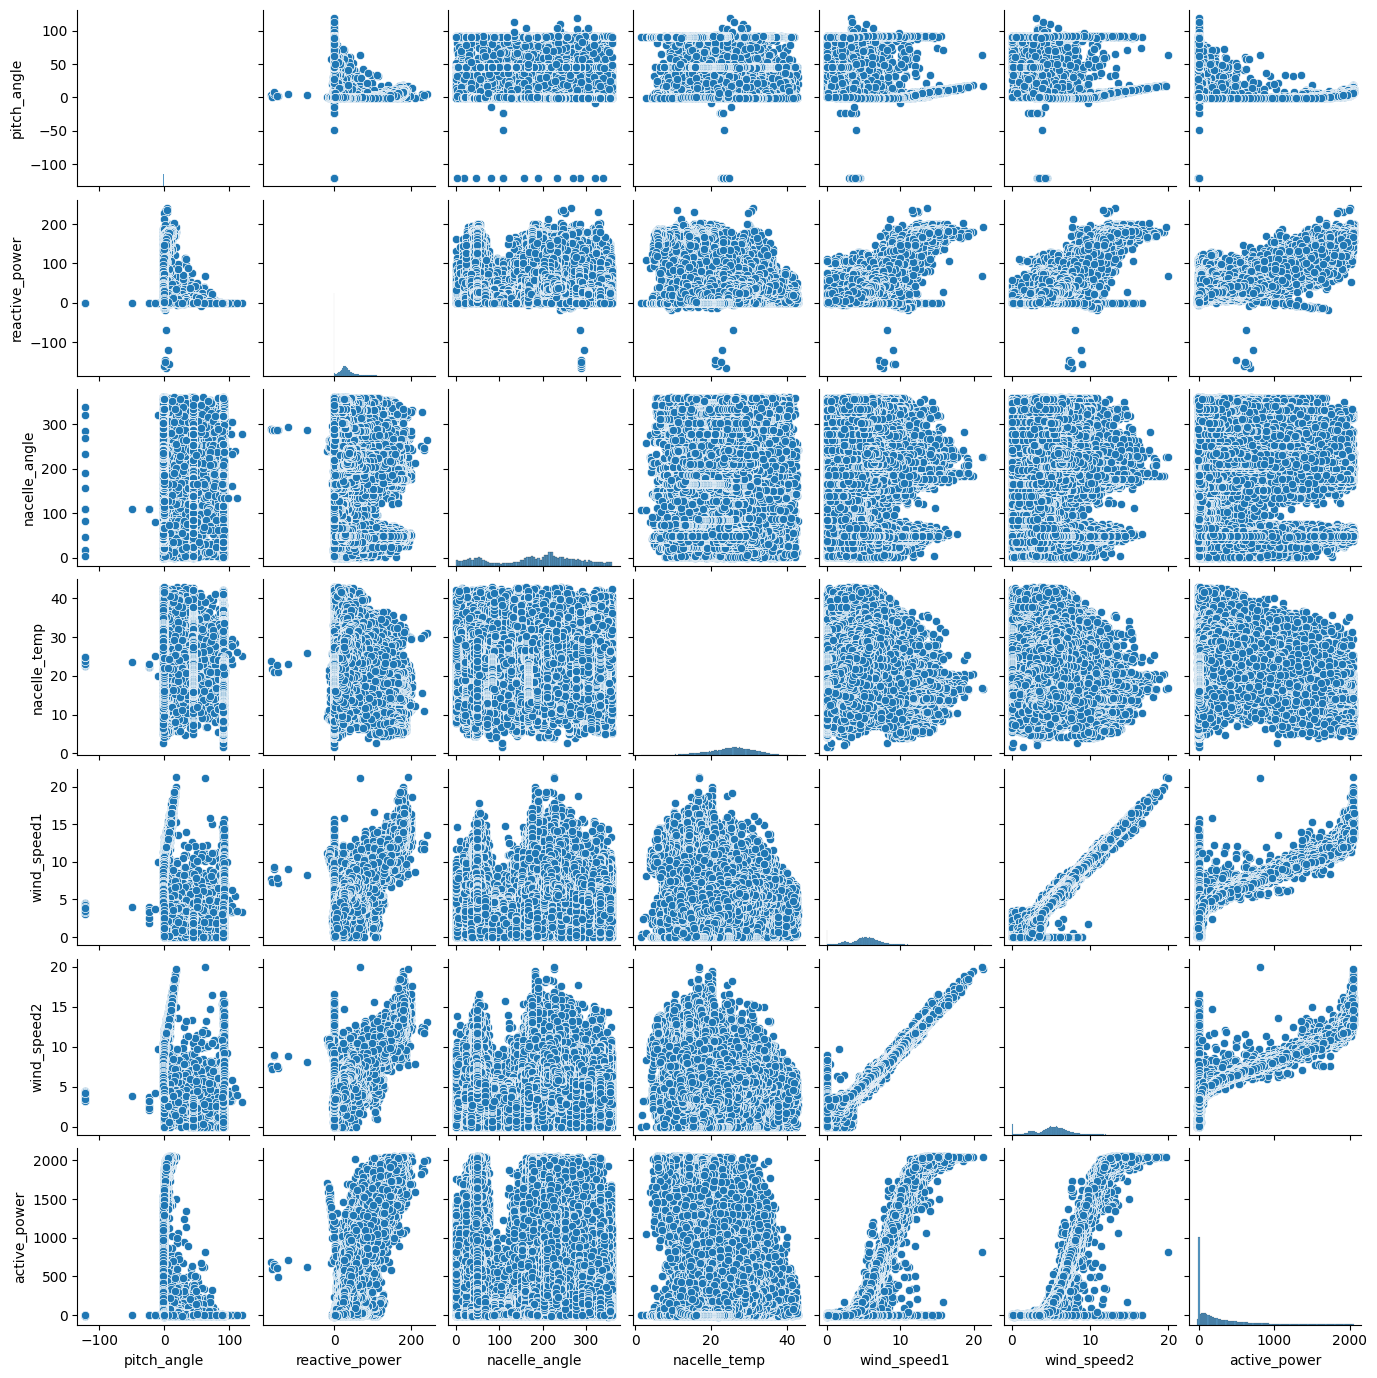

In [31]:
influential_features1 = ['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','active_power']
sns.pairplot(train_data[influential_features1],height=2)

Pair Plot for wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp, active_power

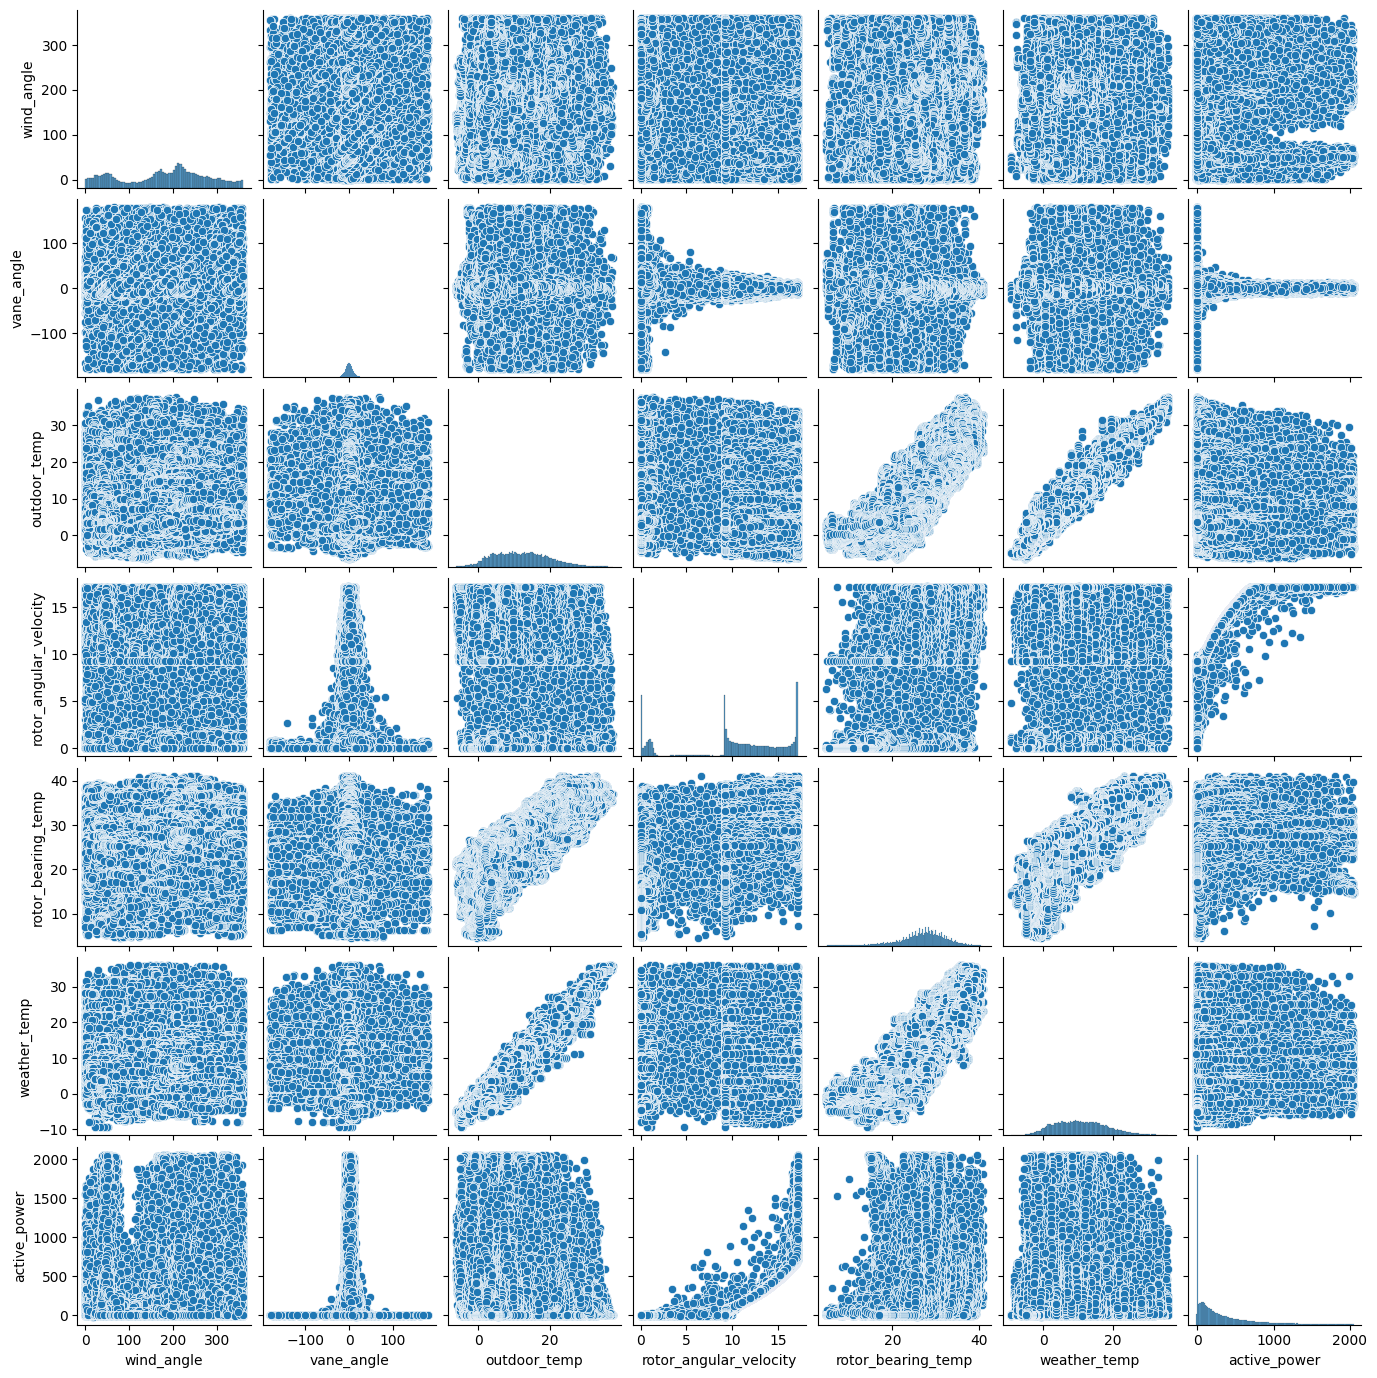

In [32]:
influential_features2 = ['wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','active_power']
sns.pairplot(train_data[influential_features2],height=2)

Pair Plot for pressure, humidity, weather_wind_speed, weather_wind_angle, rain_1h, snow_1h

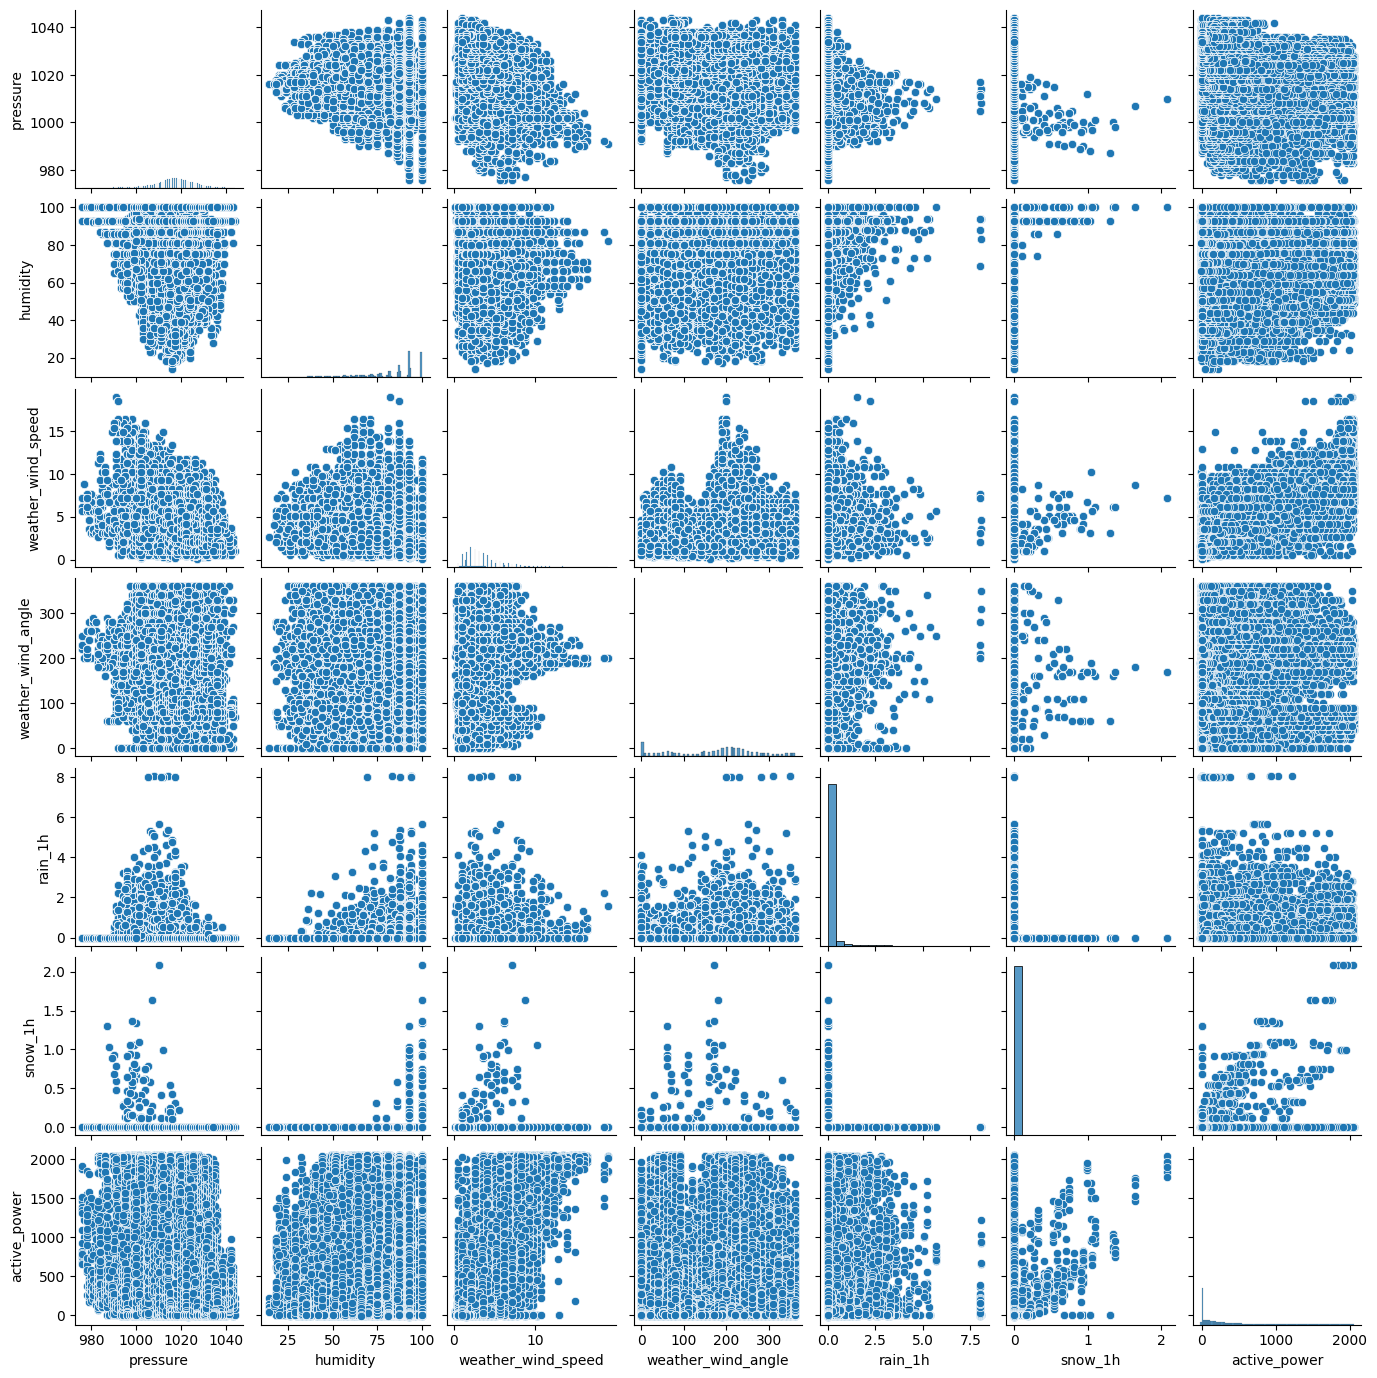

In [33]:
influential_features3 = ['pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h','active_power']
sns.pairplot(train_data[influential_features3],height=2)

Correlation Influential Features1

In [38]:
train_data[influential_features1].corr()



pitch_angle  reactive_power  nacelle_angle  nacelle_temp  \
pitch_angle        1.000000       -0.464738      -0.016507     -0.086762   
reactive_power    -0.464738        1.000000       0.036307     -0.279224   
nacelle_angle     -0.016507        0.036307       1.000000      0.001861   
nacelle_temp      -0.086762       -0.279224       0.001861      1.000000   
wind_speed1       -0.594993        0.859482       0.055790     -0.184557   
wind_speed2       -0.592708        0.860295       0.049704     -0.221878   
active_power      -0.363420        0.900180       0.053041     -0.345155   

                wind_speed1  wind_speed2  active_power  
pitch_angle       -0.594993    -0.592708     -0.363420  
reactive_power     0.859482     0.860295      0.900180  
nacelle_angle      0.055790     0.049704      0.053041  
nacelle_temp      -0.184557    -0.221878     -0.345155  
wind_speed1        1.000000     0.988430      0.886183  
wind_speed2        0.988430     1.000000      0.883143  
active_power       0.886183     0.883143      1.000000

Correlation Influential Features2

In [36]:
train_data[influential_features2].corr()

wind_angle  vane_angle  outdoor_temp  \
wind_angle                1.000000   -0.029853     -0.005359   
vane_angle               -0.029853    1.000000      0.014783   
outdoor_temp             -0.005359    0.014783      1.000000   
rotor_angular_velocity    0.061536   -0.014809     -0.145413   
rotor_bearing_temp        0.045595    0.010712      0.756958   
weather_temp              0.040636    0.011591      0.963074   
active_power              0.068155   -0.011258     -0.177630   

                        rotor_angular_velocity  rotor_bearing_temp  \
wind_angle                            0.061536            0.045595   
vane_angle                           -0.014809            0.010712   
outdoor_temp                         -0.145413            0.756958   
rotor_angular_velocity                1.000000            0.346199   
rotor_bearing_temp                    0.346199            1.000000   
weather_temp                         -0.078201            0.752631   
active_power                          0.718239            0.181216   

                        weather_temp  active_power  
wind_angle                  0.040636      0.068155  
vane_angle                  0.011591     -0.011258  
outdoor_temp                0.963074     -0.177630  
rotor_angular_velocity     -0.078201      0.718239  
rotor_bearing_temp          0.752631      0.181216  
weather_temp                1.000000     -0.109827  
active_power               -0.109827      1.000000

Correlation Influential Features3

In [37]:
train_data[influential_features3].corr()

pressure  humidity  weather_wind_speed  \
pressure            1.000000 -0.030234           -0.228328   
humidity           -0.030234  1.000000           -0.130110   
weather_wind_speed -0.228328 -0.130110            1.000000   
weather_wind_angle -0.048055  0.085178            0.218068   
rain_1h            -0.166766  0.118182            0.100931   
snow_1h            -0.076581  0.034968            0.028531   
active_power       -0.163830  0.006019            0.745152   

                    weather_wind_angle   rain_1h   snow_1h  active_power  
pressure                     -0.048055 -0.166766 -0.076581     -0.163830  
humidity                      0.085178  0.118182  0.034968      0.006019  
weather_wind_speed            0.218068  0.100931  0.028531      0.745152  
weather_wind_angle            1.000000  0.059871 -0.007177      0.106740  
rain_1h                       0.059871  1.000000 -0.007613      0.086805  
snow_1h                      -0.007177 -0.007613  1.000000      0.028852  
active_power                  0.106740  0.086805  0.028852      1.000000

**Finding** : Good positive correlation of Active Power with reactive_power, wind_speed1,wind_speed2, weather_wind_speed, rotor_angular_velocity

Mean and variance for Active Power

In [44]:
active_power_mean = train_data['active_power'].mean()
active_power_std_dev = train_data['active_power'].std()
print("Describe: ",train_data['active_power'].describe())

Describe:  count    208910.000000
mean        333.816039
std         427.064175
min         -18.490000
25%          24.459999
50%         170.530000
75%         467.130000
max        2051.120100
Name: active_power, dtype: float64


Confidence Interval for Active Power

In [51]:
from scipy import stats
active_power_ci = stats.norm.interval(0.95, loc=active_power_mean,scale=active_power_std_dev)
print("Active Power at 95% confidence interval is: ", active_power_ci)

Active Power at 95% confidence interval is:  (-503.2143635337569, 1170.8464409943108)


Data Cleaning -Select subset of attributes based on their co relation with Active Power -Select subset of data based on the confidence interval for active power

In [9]:
train_data_subset_attr = train_data[['active_power','reactive_power','wind_speed1' , 'wind_speed2', 'weather_wind_speed', 'rotor_angular_velocity']]
train_data_subset_attr

active_power  reactive_power  wind_speed1  wind_speed2  \
0         801.22998       67.559998         7.52         7.76   
1         943.16998       70.260002         8.18         8.45   
2         998.48999       75.330002         8.29         8.66   
3         837.96002       82.739998         7.89         8.24   
4         871.57001       82.349998         7.86         8.20   
...             ...             ...          ...          ...   
99041     547.10999       36.270000         7.08         6.95   
99042     224.64000       36.580002         5.60         5.47   
99043     255.07001       36.130001         5.85         5.76   
99044     271.07001       39.900002         5.91         5.78   
99045     262.54001             NaN          NaN          NaN   

       weather_wind_speed  rotor_angular_velocity  
0                    5.66               16.950001  
1                    5.66               17.139999  
2                    5.66               17.150000  
3                    5.66               16.910000  
4                    5.66               16.920000  
...                   ...                     ...  
99041                4.63               15.430000  
99042                4.63               12.060000  
99043                4.63               12.570000  
99044                4.63               12.720000  
99045                 NaN                     NaN  

[99046 rows x 6 columns]

Filter out data with Active power beyond the confidence interval

First Linear Regression

In [ ]:
mask = train_data_subset_attr['wind_speed2'].notnull()
train_data_subset_attr = train_data_subset_attr.loc[mask]
train_data_lr1 = train_data_subset_attr[['active_power','wind_speed2']]

X = sm.add_constant(train_data_lr1['wind_speed2'])
X.head(5)
Y = train_data_lr1['active_power']
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size = 0.8, random_state = 100)
train_X.head(5)
active_power_lm = OLS(train_y, train_X).fit()
print(active_power_lm.params)
print(active_power_lm.summary())


In [ ]:
y_active_power_lm = active_power_lm.predict(test_X)
print("Prediction for Test set: {}".format(y_active_power_lm))

In [ ]:
dif = pd.DataFrame({"Actual value": test_y,"Predicted value": y_active_power_lm})
dif.head()

In [71]:
meanAbErr = metrics.mean_absolute_error(test_y, y_active_power_lm)
meanSqErr = metrics.mean_squared_error(test_y, y_active_power_lm)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_active_power_lm))
#print('R squared: {:.2f}'.format(OLS(train_y, train_X).score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 151.6772266034277
Mean Square Error: 37662.94457399793
Root Mean Square Error: 194.06943235346964


### Building a first submission

For a first submission, let's just take the average consumption for the power output of the training set, and use this value for all test samples:

In [ ]:
avg_power = train_data["active_power"].mean()
print(avg_power)

333.8160387302769


In [ ]:
predictions = np.full(test_data.shape[0], avg_power)
len(predictions)

52228

Let's put this in a numpy array with length of our test dataset. For the assignment, 'predictions' will be the output of your machine learning models, instead of just creating this average guess:

Create a unique filename based on timestamp:

In [ ]:
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

Let's create our pandas dataframe and write it to csv. You can submit this file to Kaggle.

In [ ]:
submission = pd.DataFrame(data=predictions, columns=["active_power"])
submission.reset_index(inplace=True)
submission = submission.rename(columns = {'index':'id'})
submission.head()

id  active_power
0   0    333.816039
1   1    333.816039
2   2    333.816039
3   3    333.816039
4   4    333.816039

In [ ]:
submission.to_csv(generate_unique_filename("average_submission", "csv"), index=False)

This submission will get a (bad) MAE score of about 336.

### Let's try something a bit more fancy:

I will use the manufacturer windspeed-power curve that I obtained by googling the wind turbine model, in order to create a better (non machine learning) model. For wind turbines, the relationship between the wind speed and the power output is the most important one for performance metrics (but of course is influenced by all other features as well).

In [ ]:
# speed-power curve from wind turbine manual:
theo_speeds = np.arange(0, 22.5, 0.5)
theo_powers = [0, 0, 0, 0, 0, 0, 0, 0, 55, 110, 186, 264, 342, 424, 506, 618, 730, 865, 999, 1195, 1391, 1558, 1724, 1828, 1909, 1960, 2002, 2025, 2044,
               2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050]

In [ ]:
# Create a scatter plot of wind speed vs. power
plt.figure(figsize=(10, 7))
sns.scatterplot(x='wind_speed_avg', y='active_power', data=train_data)
sns.lineplot(x=theo_speeds, y=theo_powers, marker=".", markersize=20, linewidth=5, c="orange")
plt.title('Wind Speed at turbine vs. Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend(loc="lower right", labels=["Measured power", "Manufacturing power curve"])
plt.show()

<IPython.core.display.Javascript object>

We can see that this theoretical curve already will do much better than just taking the average. But there is still much room for improvement! This will be the task of your machine learning models. Let's create predictions based on this theoretical curve and submit them to Kaggle:

In [61]:
# a function for binning the wind speeds into 0, 0.5, 1, ... just like the theoretical manufacturer curve:
def mean_speed(x):
    for i in np.arange(0.25, 25, 0.5):
        if x < i:
            x = i - 0.25
            return x

# apply the binning to our test data:
test_data["mean_wind_speed"] = test_data["wind_speed_avg"].apply(mean_speed)

NameError: ignored

In [ ]:
prediction_theo = np.zeros(test_data.shape[0])
for i in test_data["mean_wind_speed"].index:
    prediction_theo[i] += theo_powers[int(test_data["mean_wind_speed"][i]*2)]  # * 2 is because theo curve is per 0.5


In [ ]:
submission_theo = pd.DataFrame(data=prediction_theo, columns=["active_power"])
submission_theo.reset_index(inplace=True)
submission_theo = submission_theo.rename(columns = {'index':'id'})
submission_theo.head()

id  active_power
0   0           0.0
1   1           0.0
2   2           0.0
3   3           0.0
4   4           0.0

In [ ]:
submission_theo.to_csv(generate_unique_filename("manufacturer_curve_submission", "csv"), index=False)

This submission will get a better MAE score of about 57. Of course, this was based on the manufacturing curve, which is clearly not perfectly aligned with the actual data we have. The real data does provide more accurate measurements, so it is important we use it. Moreover, we are basically just using one feature here (wind speed), while we have many other features which our machine learning models can take into account to improve the predictions. If real life applications that need to predict wind turbine power output only use the (general) manufacturer power curve, they are leaving much improvements on the table. Each turbine is different, so one curve can hardly fit all, and other variables influence the power output at specific times as well.